# Read data

In [70]:
import pandas as pd
import numpy as np

def generateData(file1, file2):
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    df2 = df2.rename(columns={'number_plate': 'NumberPlate'})
    merged_df = pd.merge(df1, df2, on='NumberPlate', how='inner')
    return merged_df

merged_df = generateData("mvr_synthetic_data.csv", "crash.csv")
merged_df

,Name,CarMake,CarModel,Year,NumberPlate,Gender,Age,date,primary_contributor,crash_severity
0,John Smith,Toyota,Corolla,2017,ABC-1234,Male,34,2021-03-12,Yes,non-fatal
1,John Smith,Toyota,Corolla,2017,ABC-1234,Male,34,2022-03-31,No,non-fatal
2,John Smith,Toyota,Corolla,2017,ABC-1234,Male,34,2022-01-01,No,extremely
3,John Smith,Toyota,Corolla,2017,ABC-1234,Male,34,2022-01-14,Yes,extremely
4,John Smith,Toyota,Corolla,2017,ABC-1234,Male,34,2021-12-02,No,non-fatal
...,...,...,...,...,...,...,...,...,...,...
60,Lucas Thomas,Subaru,Outback,2021,GHI-5291,Male,41,2020-07-01,No,non-fatal
61,Lucas Thomas,Subaru,Outback,2021,GHI-5291,Male,41,2021-03-09,Yes,extremely
62,Lucas Thomas,Subaru,Outback,2021,GHI-5291,Male,41,2020-03-01,Yes,non-fatal
63,Lucas Thomas,Subaru,Outback,2021,GHI-5291,Male,41,2021-09-23,No,severe


# Data analysis

         Name CarMake CarModel  Year NumberPlate Gender  Age        date  \
0  John Smith  Toyota  Corolla  2017    ABC-1234   Male   34  2021-03-12   
1  John Smith  Toyota  Corolla  2017    ABC-1234   Male   34  2022-03-31   
2  John Smith  Toyota  Corolla  2017    ABC-1234   Male   34  2022-01-01   
3  John Smith  Toyota  Corolla  2017    ABC-1234   Male   34  2022-01-14   
4  John Smith  Toyota  Corolla  2017    ABC-1234   Male   34  2021-12-02   

  primary_contributor crash_severity  
0                 Yes      non-fatal  
1                  No      non-fatal  
2                  No      extremely  
3                 Yes      extremely  
4                  No      non-fatal  
              Year        Age
count    65.000000  65.000000
mean   2018.692308  35.753846
std       1.488740   8.490860
min    2016.000000  25.000000
25%    2017.000000  29.000000
50%    2019.000000  34.000000
75%    2020.000000  43.000000
max    2021.000000  52.000000

Unique values in column 'Name':
Name
L

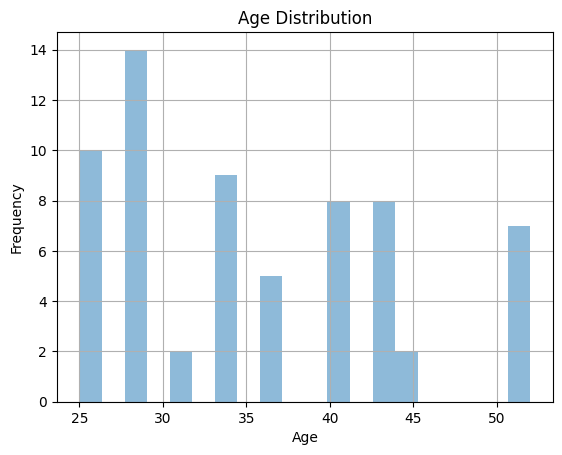

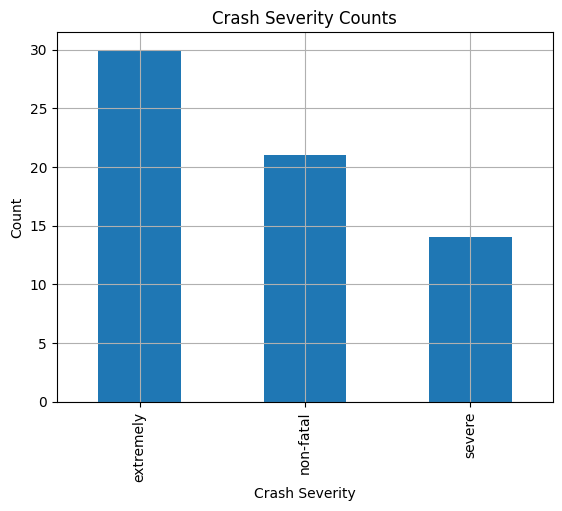


There are duplicated entries in the 'Name' and 'NumberPlate' pairs.


In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Assuming the data is in a csv file, load the dataset
data = merged_df

# Display the first few rows of the dataset to understand the structure
print(data.head())

# Display the summary statistics of numerical columns
print(data.describe())

# Checking the unique values and their counts for each column
for col in data.columns:
    print(f"\nUnique values in column '{col}':")
    print(data[col].value_counts())

# Checking for any missing values
print(f"\nMissing values for each column:")
print(data.isnull().sum())

# Visualize the age distribution
plt.hist(data['Age'], bins=20, alpha=0.5)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualize the crash severity counts
data['crash_severity'].value_counts().plot(kind='bar')
plt.title('Crash Severity Counts')
plt.xlabel('Crash Severity')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Check if the 'Name' and 'NumberPlate' pairs are unique, if not this can affect the k-anonymization process
if data.duplicated(subset=['Name', 'NumberPlate']).any():
    print("\nThere are duplicated entries in the 'Name' and 'NumberPlate' pairs.")
else:
    print("\nEach 'Name' and 'NumberPlate' pair is unique.")


# 4 Algorithms of K- anonymity
## 4.3.1 Datafly 
## 4.3.2 Incognito
## 4.3.3 Greedy Top-down algorithm 
## 4.3.4 Algorithm based on k-NN Clustering 
## 4.3.5 Basic Mondrian 


In [54]:
def generalize(df, column, k):
    value_counts = df[column].value_counts()
    rare_values = value_counts[value_counts < k].index
    df[column] = df[column].replace(rare_values, 'Other')

def datafly_anonymization(df, k): # 4.3.1 Datafly
    df = df.copy()
    for column in sorted(df.columns, key=lambda x: df[x].nunique()):
        generalize(df, column, k)
    return df

df = merged_df  # assuming you read the data from a csv file
k = 5
k_anonymized_df = datafly_anonymization(df, k)
k_anonymized_df

,Name,CarMake,CarModel,Year,NumberPlate,Gender,Age,date,primary_contributor,crash_severity
0,John Smith,Toyota,Corolla,2017,ABC-1234,Male,34,Other,Yes,non-fatal
1,John Smith,Toyota,Corolla,2017,ABC-1234,Male,34,Other,No,non-fatal
2,John Smith,Toyota,Corolla,2017,ABC-1234,Male,34,Other,No,extremely
3,John Smith,Toyota,Corolla,2017,ABC-1234,Male,34,Other,Yes,extremely
4,John Smith,Toyota,Corolla,2017,ABC-1234,Male,34,Other,No,non-fatal
...,...,...,...,...,...,...,...,...,...,...
60,Lucas Thomas,Subaru,Outback,2021,GHI-5291,Male,41,Other,No,non-fatal
61,Lucas Thomas,Subaru,Outback,2021,GHI-5291,Male,41,Other,Yes,extremely
62,Lucas Thomas,Subaru,Outback,2021,GHI-5291,Male,41,Other,Yes,non-fatal
63,Lucas Thomas,Subaru,Outback,2021,GHI-5291,Male,41,Other,No,severe


In [4]:
import pandas as pd
import numpy as np

def incognito_anonymization(df, k): # 4.3.2 Incognito
    anonymized_df = df.copy()
    
    # Iterate over each sensitive attribute
    for sensitive_attr in ['primary_contributor', 'crash_severity']:
        unique_values = df[sensitive_attr].unique()
        
        # Iterate over each unique value of the sensitive attribute
        for value in unique_values:
            group_indices = df[df[sensitive_attr] == value].index
            
            # Check if the group size is less than k
            if len(group_indices) < k:
                continue
            
            # Randomly select k rows from the group
            selected_indices = np.random.choice(group_indices, size=k, replace=False)
            
            # Anonymize the selected rows by replacing the sensitive attribute value
            anonymized_df.loc[selected_indices, sensitive_attr] = 'anonymous'
    
    return anonymized_df

# Set the value of k for k-anonymity
k = 5

# Anonymize the merged_df dataframe using the Incognito algorithm
anonymized_df = incognito_anonymization(merged_df, k)
anonymized_df

,Name,CarMake,CarModel,Year,NumberPlate,Gender,Age,date,primary_contributor,crash_severity
0,John Smith,Toyota,Corolla,2017,ABC-1234,Male,34,2021-03-12,Yes,anonymous
1,John Smith,Toyota,Corolla,2017,ABC-1234,Male,34,2022-03-31,No,non-fatal
2,John Smith,Toyota,Corolla,2017,ABC-1234,Male,34,2022-01-01,No,extremely
3,John Smith,Toyota,Corolla,2017,ABC-1234,Male,34,2022-01-14,Yes,extremely
4,John Smith,Toyota,Corolla,2017,ABC-1234,Male,34,2021-12-02,No,non-fatal
...,...,...,...,...,...,...,...,...,...,...
60,Lucas Thomas,Subaru,Outback,2021,GHI-5291,Male,41,2020-07-01,No,non-fatal
61,Lucas Thomas,Subaru,Outback,2021,GHI-5291,Male,41,2021-03-09,Yes,extremely
62,Lucas Thomas,Subaru,Outback,2021,GHI-5291,Male,41,2020-03-01,Yes,anonymous
63,Lucas Thomas,Subaru,Outback,2021,GHI-5291,Male,41,2021-09-23,No,severe


In [5]:
import pandas as pd

def top_down_greedy_anonymization(df, k): # 4.3.3 Greedy Top-down algorithm
    anonymized_df = df.copy()
    anonymized_df['cluster'] = 0

    def anonymize_group(group_df):
        if len(group_df) >= k:
            return group_df

        column = select_dimension(group_df)
        values = group_df[column].unique()

        for value in values:
            subset = group_df[group_df[column] == value]
            if len(subset) >= k:
                anonymized_df.loc[subset.index, 'cluster'] = subset.index.min()
            else:
                anonymize_group(subset)

    anonymize_group(anonymized_df)

    return anonymized_df

def select_dimension(df):
    min_entropy = float('inf')
    selected_column = None

    for column in df.columns:
        if column == 'cluster':
            continue
        entropy = calculate_entropy(df[column])
        if entropy < min_entropy:
            min_entropy = entropy
            selected_column = column

    return selected_column

def calculate_entropy(column):
    value_counts = column.value_counts()
    probabilities = value_counts / len(column)
    entropy = -sum(probabilities * probabilities.apply(lambda p: 0 if p == 0 else p * log(p, 2)))

    return entropy

# Set the value of k for k-anonymity
k = 5

# Anonymize the merged_df dataframe using the Top-Down Greedy Anonymization algorithm
anonymized_df = top_down_greedy_anonymization(merged_df, k)
anonymized_df

,Name,CarMake,CarModel,Year,NumberPlate,Gender,Age,date,primary_contributor,crash_severity,cluster
0,John Smith,Toyota,Corolla,2017,ABC-1234,Male,34,2021-03-12,Yes,non-fatal,0
1,John Smith,Toyota,Corolla,2017,ABC-1234,Male,34,2022-03-31,No,non-fatal,0
2,John Smith,Toyota,Corolla,2017,ABC-1234,Male,34,2022-01-01,No,extremely,0
3,John Smith,Toyota,Corolla,2017,ABC-1234,Male,34,2022-01-14,Yes,extremely,0
4,John Smith,Toyota,Corolla,2017,ABC-1234,Male,34,2021-12-02,No,non-fatal,0
...,...,...,...,...,...,...,...,...,...,...,...
60,Lucas Thomas,Subaru,Outback,2021,GHI-5291,Male,41,2020-07-01,No,non-fatal,0
61,Lucas Thomas,Subaru,Outback,2021,GHI-5291,Male,41,2021-03-09,Yes,extremely,0
62,Lucas Thomas,Subaru,Outback,2021,GHI-5291,Male,41,2020-03-01,Yes,non-fatal,0
63,Lucas Thomas,Subaru,Outback,2021,GHI-5291,Male,41,2021-09-23,No,severe,0


In [6]:
import pandas as pd
from sklearn.cluster import KMeans

def clustering_anonymization(df, k): # Algorithm based on k-NN Clustering
    anonymized_df = df.copy()
    
    # Exclude non-numeric columns from clustering
    numeric_cols = anonymized_df.select_dtypes(include='number').columns
    anonymized_df = anonymized_df[numeric_cols]

    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(anonymized_df)
    anonymized_df['cluster'] = kmeans.labels_

    return anonymized_df

# Set the value of k for k-anonymity
k = 5

# Anonymize the merged_df dataframe using the Clustering-based k-Anonymization algorithm
anonymized_df = clustering_anonymization(merged_df, k)
anonymized_df

/Users/jing.xu/.local/share/virtualenvs/data-anonymization-MfPseODn/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Year,Age,cluster
0,2017,34,2
1,2017,34,2
2,2017,34,2
3,2017,34,2
4,2017,34,2
...,...,...,...
60,2021,41,1
61,2021,41,1
62,2021,41,1
63,2021,41,1


In [7]:
import pandas as pd
import numpy as np

def mondrian_anonymization(df, k): # 4.3.5 Basic Mondrian
    anonymized_df = df.copy()
    
    def mondrian_recursive(data):
        if len(data) < k:
            return
        
        attribute = max(data.columns, key=lambda x: data[x].nunique())
        
        sorted_data = data.sort_values(attribute)
        
        midpoint = sorted_data.iloc[len(sorted_data) // 2][attribute]
        
        group1 = sorted_data[sorted_data[attribute] <= midpoint]
        group2 = sorted_data[sorted_data[attribute] > midpoint]
        
        mondrian_recursive(group1)
        mondrian_recursive(group2)
        
        data.update(group1)
        data.update(group2)
    
    # Convert numeric columns to float for Mondrian algorithm
    numeric_columns = ['Age', 'Year']
    anonymized_df[numeric_columns] = anonymized_df[numeric_columns].astype(float)
    
    mondrian_recursive(anonymized_df)
    
    # Convert numeric columns back to integer
    anonymized_df[numeric_columns] = anonymized_df[numeric_columns].astype(int)
    
    return anonymized_df

# Set the value of k for k-anonymity
k = 5

# Anonymize the merged_df dataframe using the Mondrian algorithm
anonymized_df = mondrian_anonymization(merged_df, k)
anonymized_df

,Name,CarMake,CarModel,Year,NumberPlate,Gender,Age,date,primary_contributor,crash_severity
0,John Smith,Toyota,Corolla,2017,ABC-1234,Male,34,2021-03-12,Yes,non-fatal
1,John Smith,Toyota,Corolla,2017,ABC-1234,Male,34,2022-03-31,No,non-fatal
2,John Smith,Toyota,Corolla,2017,ABC-1234,Male,34,2022-01-01,No,extremely
3,John Smith,Toyota,Corolla,2017,ABC-1234,Male,34,2022-01-14,Yes,extremely
4,John Smith,Toyota,Corolla,2017,ABC-1234,Male,34,2021-12-02,No,non-fatal
...,...,...,...,...,...,...,...,...,...,...
60,Lucas Thomas,Subaru,Outback,2021,GHI-5291,Male,41,2020-07-01,No,non-fatal
61,Lucas Thomas,Subaru,Outback,2021,GHI-5291,Male,41,2021-03-09,Yes,extremely
62,Lucas Thomas,Subaru,Outback,2021,GHI-5291,Male,41,2020-03-01,Yes,non-fatal
63,Lucas Thomas,Subaru,Outback,2021,GHI-5291,Male,41,2021-09-23,No,severe


# 4.4 Evaluation Metrics for Privacy Preservation and Analytical Utility!
## 4.4.1 Discernibility Metric (DM)
## 4.4.2 Average Equivalence class size Metric (CAV G)
## 4.4.3 Normalized Certainty Penalty (NCP) 


In [15]:
class DM:
    """
    Discernibility Metric implementation based on definition from
    http://www.tdp.cat/issues11/tdp.a169a14.pdf
    """
    def __init__(self, anon_data, qi_index, k) -> None:
        self.anon_data = anon_data
        self.num_records = len(anon_data)
        self.qi_index = qi_index
        self.k = k
        self.num_qi = len(qi_index)

    def compute_eq(self):
        self.eq_count = {}
        for record in self.anon_data:
            qi_values = []
            for idx, qi_id in enumerate(self.qi_index):
                value = record[qi_id]
                qi_values.append(value)
            
            # Make set, because set is hashable
            eq = tuple(qi_values)

            # Count set of qi values
            if eq not in self.eq_count.keys():
                self.eq_count[eq] = 0
            self.eq_count[eq] += 1

    def compute_score(self):
        self.compute_eq()
        dm = 0
        for eq in self.eq_count.keys():
            eq_count = self.eq_count[eq]
            if eq_count >= self.k:
                dm += (eq_count * eq_count)
            else:
                dm += (eq_count * self.num_records)

        return dm

# Set the value of k for k-anonymity
k = 5

# Define the QI index for the merged_df dataframe
qi_index = ['Name', 'CarMake', 'CarModel', 'Year', 'NumberPlate', 'Gender', 'Age', 'date']

# Convert merged_df to a list of dictionaries
anon_data = k_anonymized_df.to_dict('records')

# Create an instance of the DM class
dm = DM(anon_data, qi_index, k)

# Calculate the DM score for the merged_df dataframe after k-anonymization
dm_score = dm.compute_score()

print("DM Score:", dm_score)


DM Score: 743


In [56]:
class CAVG:
    """
    Average Equivalence class size Metric implementation based on definition from
    http://www.tdp.cat/issues11/tdp.a169a14.pdf    
    """
    def __init__(self, anon_data, qi_index, k) -> None:
        self.anon_data = anon_data
        self.qi_index = qi_index
        self.k = k
        self.num_qi = len(qi_index)

    def compute_eq(self):
        self.eq_count = {}
        for record in self.anon_data:
            qi_values = []
            for idx, qi_id in enumerate(self.qi_index):
                value = record[qi_id]
                qi_values.append(value)
            
            # Make set, because set is hashable
            eq = tuple(qi_values)

            # Count set of qi values
            if eq not in self.eq_count.keys():
                self.eq_count[eq] = 0
            self.eq_count[eq] += 1

    def compute_score(self):
        self.compute_eq()
        num_eqs = len(self.eq_count.keys())
        num_records = len(self.anon_data)

        return num_records *1.0 / (num_eqs * self.k)

# Set the value of k for k-anonymity
k = 10

# Define the QI index for the merged_df dataframe
qi_index = ['Name', 'CarMake', 'CarModel', 'Year', 'NumberPlate', 'Gender', 'Age', 'date']

# Convert merged_df to a list of dictionaries
anon_data = k_anonymized_df.to_dict('records')

# Create an instance of the DM class
cavg = CAVG(anon_data, qi_index, k)

# Calculate the DM score for the merged_df dataframe after k-anonymization
cavg_score = cavg.compute_score()

print("CAVG Score:", cavg_score)

CAVG Score: 0.65


In [51]:
def calculate_dm(df): # 4.4.1 Discernibility Metric (DM) TO DELETE
    dm_score = 0

    for _, row1 in df.iterrows():
        error = 0
        for _, row2 in df.iterrows():
            if row1 is not row2:
                if is_discernible(row1, row2):
                    error += 1
        dm_score += error

    return dm_score / len(df)

def is_discernible(row1, row2):
    for column in row1.index:
        if row1[column] != row2[column]:
            return True
    return False

# Calculate the DM score for the merged_df dataframe
dm_score = calculate_dm(anonymized_df)
dm_score

64.0

In [9]:
def calculate_cavg(original_df, anonymized_df): # 4.4.2 Average Equivalence class size Metric (CAV G)
    # Calculate size of equivalent classes in the original dataset
    original_eq_class_sizes = original_df.duplicated(keep=False).sum()

    # Calculate size of equivalent classes in the anonymized dataset
    anonymized_eq_class_sizes = anonymized_df.duplicated(keep=False).sum()

    # Calculate the average size of equivalent classes in the original dataset
    original_cavg = original_eq_class_sizes / len(original_df)

    # Calculate the average size of equivalent classes in the anonymized dataset
    anonymized_cavg = anonymized_eq_class_sizes / len(anonymized_df)

    # Information loss is the absolute difference between CAVG values of original and anonymized dataset
    info_loss = abs(original_cavg - anonymized_cavg)

    return info_loss
calculate_cavg(merged_df, k_anonymized_df )

0.6615384615384615

In [10]:
def calculate_ncp(anonymized_data, original_data): # 4.4.3 Normalized Certainty Penalty (NCP)
    ncp_sum = 0
    num_attributes = len(anonymized_data.columns)

    for i in range(len(anonymized_data)):
        anonymized_row = anonymized_data.iloc[i]
        original_row = original_data.iloc[i]

        ncp_row = 0
        for column in anonymized_data.columns:
            if column not in ['Name', 'NumberPlate']:
                ncp_row += calculate_ncp_error(anonymized_row[column], original_row[column])

        ncp_sum += (ncp_row / (num_attributes - 2))  # Exclude 'Name' and 'NumberPlate' columns

    ncp = ncp_sum / len(anonymized_data)
    return ncp

def calculate_ncp_error(value1, value2):
    if value1 == value2:
        return 0
    else:
        return 1

# Assume anonymized_data and original_data are the anonymized and original dataframes, respectively
ncp_score = calculate_ncp(k_anonymized_df, merged_df)
print("Normalized Certainty Penalty (NCP) score:", ncp_score)


Normalized Certainty Penalty (NCP) score: 0.1519230769230769


# 5.	Experiments 
We test 5 k-anonymity methods (Classic Mondrian, Basic Mondrian,
Datafly, Top-Down Greedy, Clustering) on 6 datasets from 1 to 6 and observe
the metric points of each pair. 

To perform anonymization on the merged_df using five different algorithms (datafly_anonymization, incognito_anonymization, top_down_greedy_anonymization, clustering_anonymization, mondrian_anonymization) with k values ranging from 5 to 10, calculate three metric points (dm, cavg, ncp) for each anonymized DataFrame, and save the results in a NumPy array for further analysis and drawing a comparison graph,

In [61]:
# List of method names
method_names = [
    "datafly_anonymization",
    "incognito_anonymization",
    "top_down_greedy_anonymization",
    "clustering_anonymization",
    "mondrian_anonymization"
]

# List of k values
k_values = range(5, 21)

# List of metric points
metrics = ["dm", "cavg"] #, "ncp"]

# Initialize the result array
results = np.zeros((len(k_values), len(method_names), len(metrics)))

# Perform anonymization, calculate metrics, and store the results
for i, k in enumerate(k_values):
    for j, method_name in enumerate(method_names):
        anonymized_df = globals()[method_name](merged_df, k)
        dm_point = calculate_dm(anonymized_df)/1000
        cavg_point = calculate_cavg(merged_df, anonymized_df)
       # ncp_point = calculate_ncp(anonymized_df, merged_df)

        results[i, j, 0] = dm_point
        results[i, j, 1] = cavg_point
        #results[i, j, 2] = ncp_point



/Users/jing.xu/.local/share/virtualenvs/data-anonymization-MfPseODn/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jing.xu/.local/share/virtualenvs/data-anonymization-MfPseODn/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jing.xu/.local/share/virtualenvs/data-anonymization-MfPseODn/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jing.xu/.local/share/virtualenvs/data-anonymization-MfPseODn/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: Futur

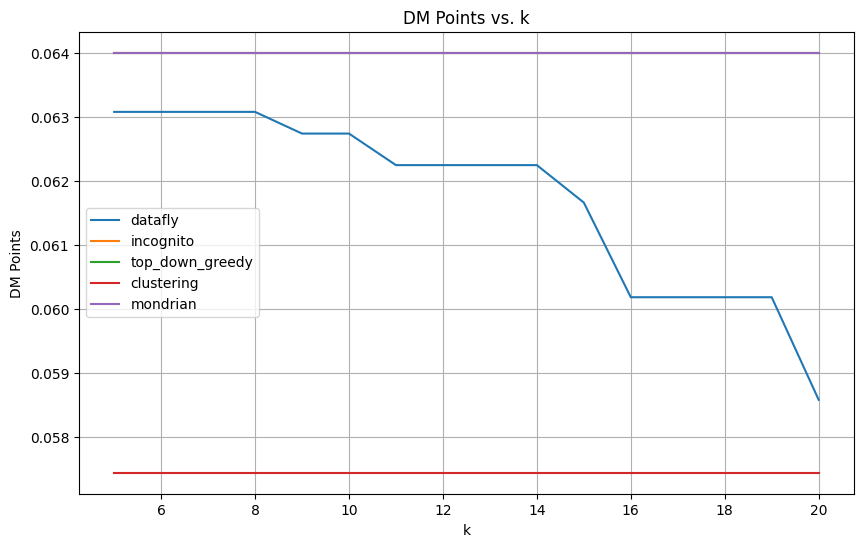

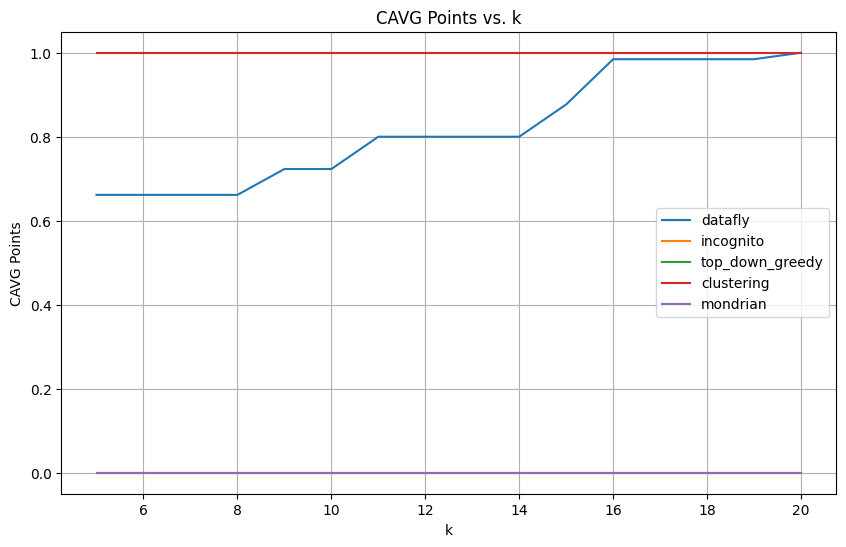

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the results array from the previous code snippet

# Extract the algorithm names from the method_names list
algorithm_names = [method_name.replace("_anonymization", "") for method_name in method_names]

# Prepare data for plotting
dm_points = results[:, :, 0]  # DM points from the results array
cavg_points = results[:, :, 1]  # CAVG points from the results array

# Plot DM points
plt.figure(figsize=(10, 6))
for i in range(len(method_names)):
    plt.plot(k_values, dm_points[:, i], label=algorithm_names[i])

plt.title("DM Points vs. k")
plt.xlabel("k")
plt.ylabel("DM Points")
plt.legend()
plt.grid(True)
plt.show()

# Plot CAVG points
plt.figure(figsize=(10, 6))
for i in range(len(method_names)):
    plt.plot(k_values, cavg_points[:, i], label=algorithm_names[i])

plt.title("CAVG Points vs. k")
plt.xlabel("k")
plt.ylabel("CAVG Points")
plt.legend()
plt.grid(True)
plt.show()


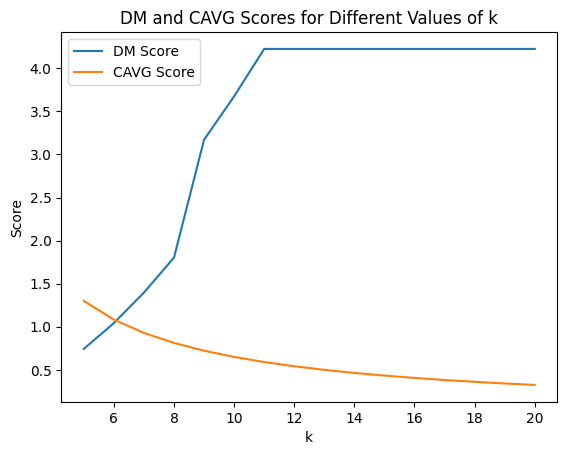

In [60]:
import matplotlib.pyplot as plt

# Define the range of k values
k_values = range(5, 21)

# Initialize lists to store DM and CAVG scores
dm_scores = []
cavg_scores = []
qi_index = ['Name', 'CarMake', 'CarModel', 'Year', 'NumberPlate', 'Gender', 'Age', 'date']

# Iterate over each value of k
for k in k_values:
    # Convert merged_df to a list of dictionaries
    anon_data = k_anonymized_df.to_dict('records')

    # Create an instance of the DM class
    dm = DM(anon_data, qi_index, k)

    # Calculate the DM score for the merged_df dataframe after k-anonymization
    dm_score = dm.compute_score()/1000

    # Create an instance of the CAVG class
    cavg = CAVG(anon_data, qi_index, k)

    # Calculate the CAVG score for the merged_df dataframe after k-anonymization
    cavg_score = cavg.compute_score()

    # Append the scores to the respective lists
    dm_scores.append(dm_score)
    cavg_scores.append(cavg_score)

# Plotting the graph
plt.plot(k_values, dm_scores, label='DM Score')
plt.plot(k_values, cavg_scores, label='CAVG Score')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('DM and CAVG Scores for Different Values of k')
plt.legend()
plt.show()


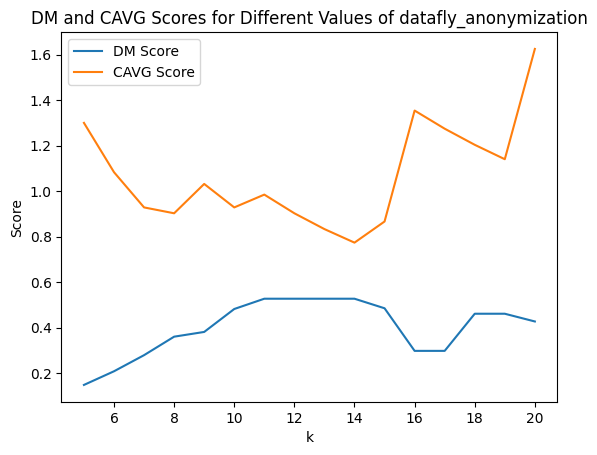

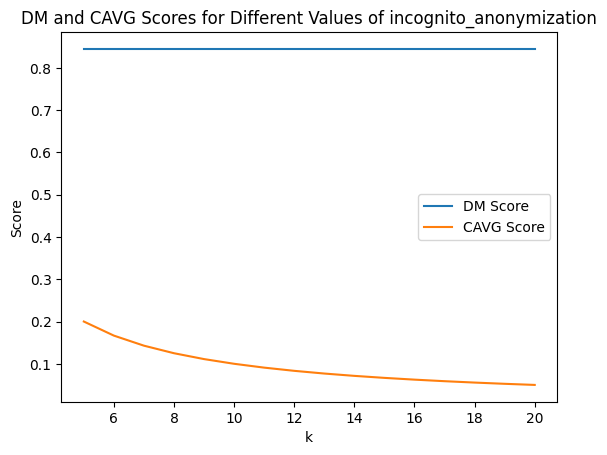

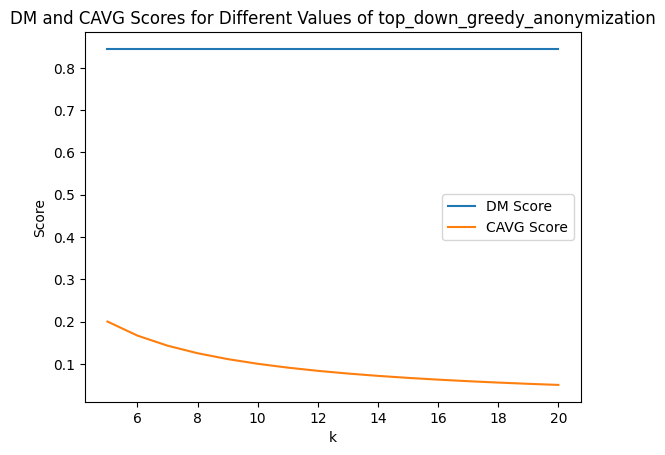

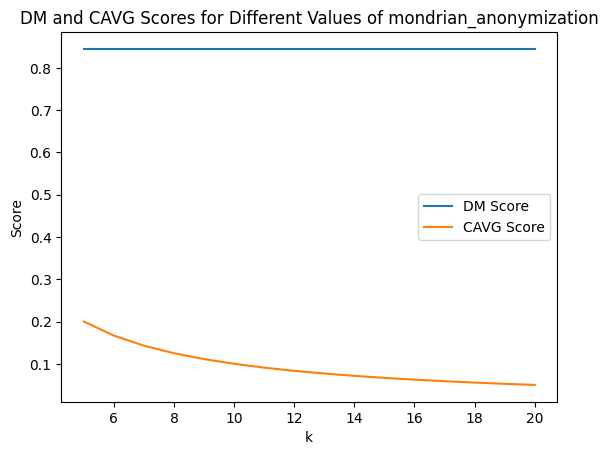

In [79]:
import matplotlib.pyplot as plt

# Define the range of k values
k_values = range(5, 21)

# Define the anonymization method names
method_names = [
    "datafly_anonymization",
    "incognito_anonymization",
    "top_down_greedy_anonymization",
   # "clustering_anonymization",
    "mondrian_anonymization"
]

# Initialize a dictionary to store DM and CAVG scores for each method
scores = {method: {"DM": [], "CAVG": []} for method in method_names}

qi_index = ['Name', 'CarMake', 'CarModel', 'Year', 'NumberPlate', 'Gender', 'Age', 'date']

# Iterate over each value of k
for k in k_values:
    for method in method_names:
        # Generate k_anonymized_df using the specific anonymization method and k value
        k_anonymized_df = globals()[method](merged_df.copy(), k)

        # Convert k_anonymized_df to a list of dictionaries
        anon_data = k_anonymized_df.to_dict('records')

        # Create an instance of the DM class
        dm = DM(anon_data, qi_index, k)

        # Calculate the DM score for the k_anonymized_df dataframe
        dm_score = dm.compute_score() / 5000

        # Create an instance of the CAVG class
        cavg = CAVG(anon_data, qi_index, k)

        # Calculate the CAVG score for the k_anonymized_df dataframe
        cavg_score = cavg.compute_score()

        # Append the scores to the respective lists for the current method
        scores[method]["DM"].append(dm_score)
        scores[method]["CAVG"].append(cavg_score)

# Plotting the graphs for each method
for method in method_names:
    plt.plot(k_values, scores[method]["DM"], label='DM Score')
    plt.plot(k_values, scores[method]["CAVG"], label='CAVG Score')
    plt.xlabel('k')
    plt.ylabel('Score')
    plt.title(f'DM and CAVG Scores for Different Values of {method}')
    plt.legend()
    plt.show()


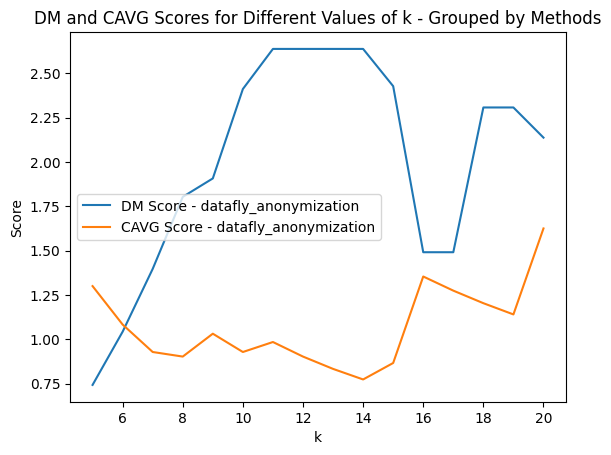

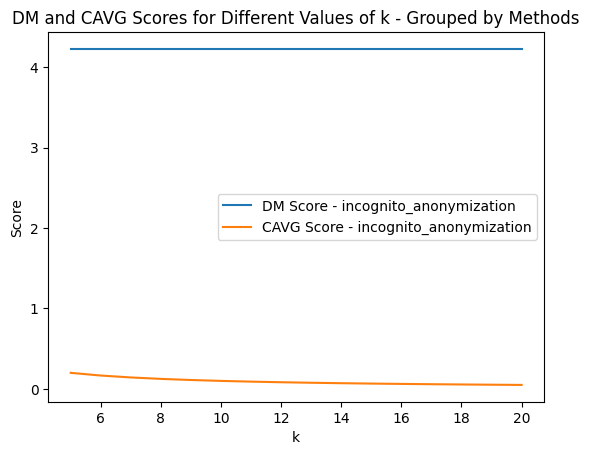

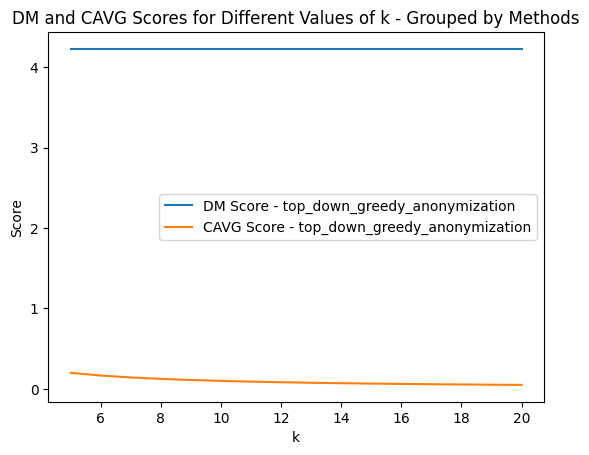

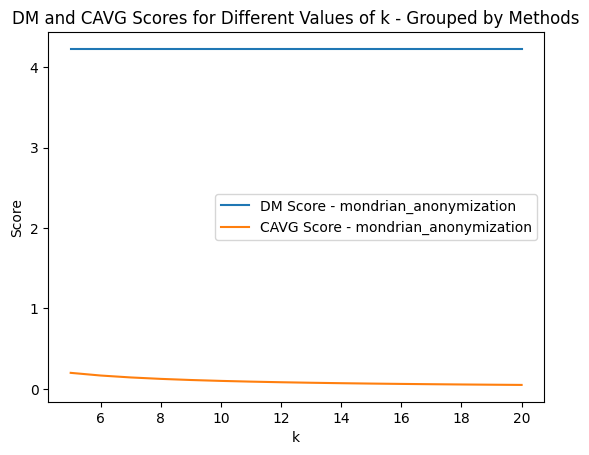

In [85]:
import matplotlib.pyplot as plt

# Define the range of k values
k_values = range(5, 21)

# Define the list of method names
method_names = [
    "datafly_anonymization",
    "incognito_anonymization",
    "top_down_greedy_anonymization",
    #"clustering_anonymization",
    "mondrian_anonymization"
]

# Initialize a dictionary to store DM and CAVG scores for each method
dm_scores = {method: [] for method in method_names}
cavg_scores = {method: [] for method in method_names}

# Iterate over each method
for method in method_names:
    # Iterate over each value of k
    for k in k_values:
        # Get k-anonymized_df using the current method and k value
        k_anonymized_df = globals()[method](merged_df.copy(), k)

        # Convert k_anonymized_df to a list of dictionaries
        anon_data = k_anonymized_df.to_dict('records')

        # Create an instance of the DM class
        dm = DM(anon_data, qi_index, k)

        # Calculate the DM score for the k_anonymized_df dataframe
        dm_score = dm.compute_score() / 1000

        # Create an instance of the CAVG class
        cavg = CAVG(anon_data, qi_index, k)

        # Calculate the CAVG score for the k_anonymized_df dataframe
        cavg_score = cavg.compute_score()

        # Append the scores to the respective lists
        dm_scores[method].append(dm_score)
        cavg_scores[method].append(cavg_score)

# Plotting the graphs
for method in method_names:
    plt.plot(k_values, dm_scores[method], label='DM Score - {}'.format(method))
    plt.plot(k_values, cavg_scores[method], label='CAVG Score - {}'.format(method))

    plt.xlabel('k')
    plt.ylabel('Score')
    plt.title('DM and CAVG Scores for Different Values of k - Grouped by Methods')
    plt.legend()
    plt.show()


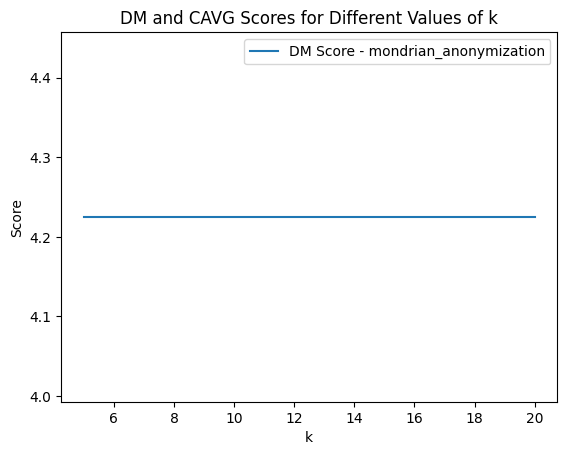

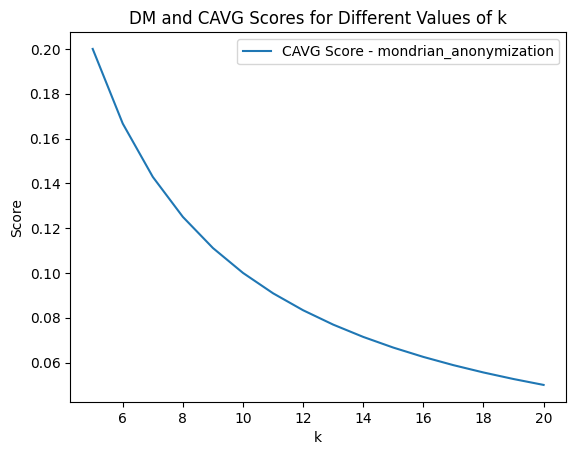

In [86]:
import matplotlib.pyplot as plt

# Define the range of k values
k_values = range(5, 21)
qi_index = ['Name', 'CarMake', 'CarModel', 'Year', 'NumberPlate', 'Gender', 'Age', 'date']

# Define the anonymization method names
method_names = [
    "datafly_anonymization",
    "incognito_anonymization",
    "top_down_greedy_anonymization",
    "clustering_anonymization",
    "mondrian_anonymization"
]

# Initialize a dictionary to store the k-anonymized DataFrames for each method
k_anonymized_dfs = {}

# Iterate over each method
for method_name in method_names:
    # Initialize a list to store the DM scores for the current method
    dm_scores = []
    # Initialize a list to store the CAVG scores for the current method
    cavg_scores = []
    # Iterate over each value of k
    for k in k_values:
        # Perform anonymization using the current method and get the k-anonymized DataFrame
        k_anonymized_df = globals()[method](merged_df.copy(), k)
        # Convert k_anonymized_df to a list of dictionaries
        anon_data = k_anonymized_df.to_dict('records')
        
        # Create an instance of the DM class
        dm = DM(anon_data, qi_index, k)
        # Calculate the DM score for the k-anonymized DataFrame
        dm_score = dm.compute_score() / 1000
        
        # Create an instance of the CAVG class
        cavg = CAVG(anon_data, qi_index, k)
        # Calculate the CAVG score for the k-anonymized DataFrame
        cavg_score = cavg.compute_score()
        
        # Append the DM and CAVG scores to the respective lists
        dm_scores.append(dm_score)
        cavg_scores.append(cavg_score)
    
# Store the k-anonymized DataFrame for the current method in the dictionary
k_anonymized_dfs[method_name] = k_anonymized_df

# Plotting the graph for the current method
plt.plot(k_values, dm_scores, label=f'DM Score - {method_name}')


# Configure the plot
plt.xlabel('k')
plt.ylabel('Score')
plt.title('DM and CAVG Scores for Different Values of k')
plt.legend()
plt.show()

plt.plot(k_values, cavg_scores, label=f'CAVG Score - {method_name}')
# Configure the plot
plt.xlabel('k')
plt.ylabel('Score')
plt.title('DM and CAVG Scores for Different Values of k')
plt.legend()
plt.show()

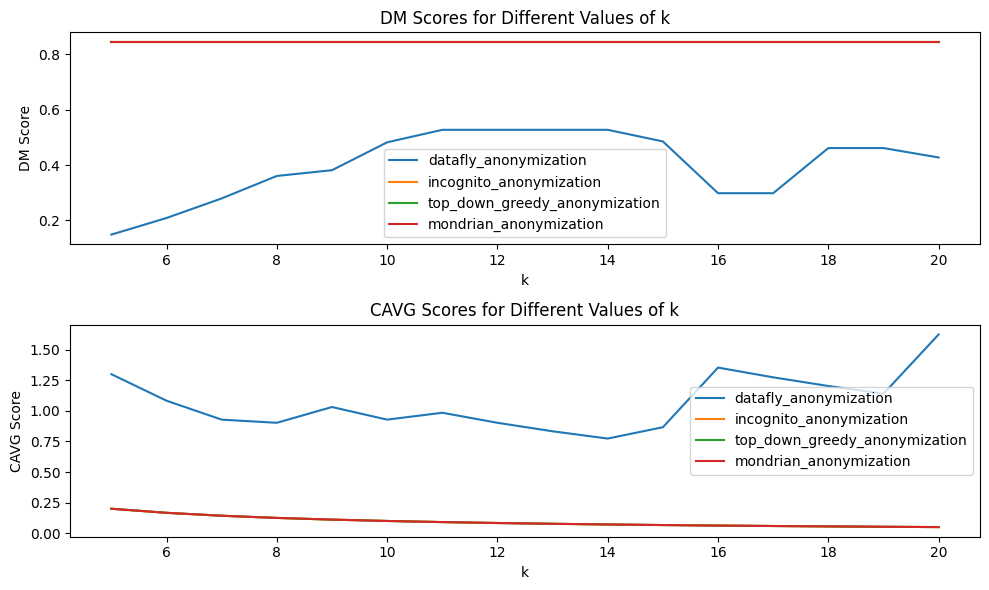

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of k values
k_values = range(5, 21)

# Define the anonymization method names
method_names = [
    "datafly_anonymization",
    "incognito_anonymization",
    "top_down_greedy_anonymization",
    #"clustering_anonymization",
    "mondrian_anonymization"
]

# Initialize a dictionary to store DM and CAVG scores for each method
scores = {method: {"DM": [], "CAVG": []} for method in method_names}

qi_index = ['Name', 'CarMake', 'CarModel', 'Year', 'NumberPlate', 'Gender', 'Age', 'date']

# Iterate over each value of k
for k in k_values:
    for method in method_names:
        # Generate k_anonymized_df using the specific anonymization method and k value
        k_anonymized_df = globals()[method](merged_df.copy(), k)

        # Convert k_anonymized_df to a list of dictionaries
        anon_data = k_anonymized_df.to_dict('records')

        # Create an instance of the DM class
        dm = DM(anon_data, qi_index, k)

        # Calculate the DM score for the k_anonymized_df dataframe
        dm_score = dm.compute_score() / 5000

        # Create an instance of the CAVG class
        cavg = CAVG(anon_data, qi_index, k)

        # Calculate the CAVG score for the k_anonymized_df dataframe
        cavg_score = cavg.compute_score()

        # Append the scores to the respective lists for the current method
        scores[method]["DM"].append(dm_score)
        scores[method]["CAVG"].append(cavg_score)

# Convert the scores dictionary to a NumPy array
score_array = np.array([
    [k] + scores[method]["DM"] + scores[method]["CAVG"]
    for method in method_names
    for k in k_values
])

# Save the scores array to a CSV file
np.savetxt('scores.csv', score_array, delimiter=',', fmt='%s')

# Plotting the comparison graph
plt.figure(figsize=(10, 6))

# Group by score columns (DM and CAVG)
for i, score_type in enumerate(["DM", "CAVG"]):
    plt.subplot(2, 1, i + 1)
    for method in method_names:
        plt.plot(k_values, scores[method][score_type], label=f'{method}')
    plt.xlabel('k')
    plt.ylabel(score_type + ' Score')
    plt.title(f'{score_type} Scores for Different Values of k')
    plt.legend()

plt.tight_layout()
plt.show()


# Industry code 


In [13]:
import pandas as pd
import csv
import re
from collections import defaultdict
from abc import ABC, abstractmethod
import math

df = pd.read_csv('mvr_synthetic_data.csv')
df.head()

import pandas as pd
import hashlib
from faker import Faker
from faker_vehicle import VehicleProvider

class ColumnAnonymiser:
    def __init__(self, data_type):
        self.data_type = data_type
    @abstractmethod
    def anonymise(self, column):
        raise NotImplementedError("Anonymise method not implemented.")

class AgeAnonymiser(ColumnAnonymiser):
    def __init__(self):
        super().__init__("age")

    def anonymise(self, column):
        age_groups = {
            0: "0-14",
            15: "15-24",
            25: "25-44",
            45: "45-64",
            65: "65+"
        }

        def map_age_group(age):
            for group_start, group_name in age_groups.items():
                if age <= group_start:
                    return group_name
            return "65+"

        return column.apply(map_age_group)

class NZNumberPlateAnonymiser(ColumnAnonymiser):
    def __init__(self):
        super().__init__("number_plate")

    def anonymise(self, column):
        # use faker_vehicle to anonymise number plate
        fake = Faker()
        vehicle_provider = VehicleProvider(fake)
        return column.apply(lambda x: vehicle_provider.numerify('###-####'))

class NameAnonymiser(ColumnAnonymiser):
    def __init__(self):
        super().__init__("name")

    def anonymise(self, column):
        faker = Faker()
        return column.apply(lambda x: faker.name())

# Mondrian algorithm for k-anonymity
def apply_mondrian_algorithm(df, k, quasi_identifiers):
    # Sort the dataset based on the quasi-identifiers
    sorted_df = df.sort_values(by=quasi_identifiers)

    # Apply Mondrian algorithm recursively
    k_anonymous_df = partition_dataset(sorted_df, k, quasi_identifiers)

    # Check if the resulting dataset satisfies k-anonymity
    if len(k_anonymous_df) >= k:
        print("Dataset satisfies k-anonymity.")
    else:
        print("Dataset does not satisfy k-anonymity.")

    return k_anonymous_df

def partition_dataset(df, k, quasi_identifiers):
    # Check if the dataset satisfies k-anonymity
    if len(df) >= k:
        return df
    else:
        # Select the most discriminating attribute for partitioning
        attribute = select_partitioning_attribute(df, quasi_identifiers)

        # Determine the optimal splitting point for the attribute
        splitting_point = determine_splitting_point(df, attribute)

        # Split the dataset into two subsets based on the splitting point
        subset1 = df[df[attribute] <= splitting_point]
        subset2 = df[df[attribute] > splitting_point]

        # Recursively partition the subsets
        return pd.concat([partition_dataset(subset1, k, quasi_identifiers), partition_dataset(subset2, k, quasi_identifiers)])

def select_partitioning_attribute(df, quasi_identifiers):
    # Select the attribute with the highest information loss
    # In this example, we can choose the attribute with the highest cardinality
    cardinalities = [df[attr].nunique() for attr in quasi_identifiers]

    return quasi_identifiers[cardinalities.index(max(cardinalities))]

def determine_splitting_point(df, attribute):
    # Determine the splitting point for the given attribute
    # In this example, we can choose the median value
    return df[attribute].median()

# Instantiate the anonymisers
age_anonymiser = AgeAnonymiser()
number_plate_anonymiser = NZNumberPlateAnonymiser()
name_anonymiser = NameAnonymiser()

# Apply anonymisation on specific columns
df['Age'] = age_anonymiser.anonymise(df['Age'])
df['NumberPlate'] = number_plate_anonymiser.anonymise(df['NumberPlate'])
df['Name'] = name_anonymiser.anonymise(df['Name'])

# Selected columns for k-anonymity
selected_columns = ['NumberPlate', 'Year']
k = 2  # k-anonymity level

# Apply Mondrian algorithm for k-anonymity on selected columns
def compute_equivalence_classes(df, quasi_identifiers):
    eq_classes = defaultdict(int)
    
    for index, row in df.iterrows():
        key = tuple(row[qi] for qi in quasi_identifiers)
        eq_classes[key] += 1
    
    return eq_classes

def is_k_anonymous(dataset, quasi_identifiers, k):
    eq_classes = compute_equivalence_classes(dataset, quasi_identifiers)
    
    for count in eq_classes.values():
        if count < k:
            return False
            
    return True

k_anonymous_df = apply_mondrian_algorithm(df, k, selected_columns)
k_anonymous_df

Dataset satisfies k-anonymity.


,Name,CarMake,CarModel,Year,NumberPlate,Gender,Age
1,Ruben Jones,Honda,Civic,2019,074-5658,Female,45-64
4,Edward Flores,Chevrolet,Impala,2020,143-8665,Male,65+
9,Matthew Woods,Subaru,Outback,2021,144-4438,Male,45-64
8,Benjamin Shepard,Mazda,3,2018,246-3015,Female,45-64
5,John Robinson,BMW,3 Series,2019,469-0723,Female,45-64
7,John Salas,Hyundai,Elantra,2017,670-6688,Male,25-44
3,Luis Bowman,Nissan,Altima,2016,756-2476,Female,45-64
0,Charles Turner,Toyota,Corolla,2017,921-0100,Male,45-64
6,Christina Hoffman,Mercedes-Benz,C-Class,2020,931-1963,Female,45-64
2,Travis Torres,Ford,Focus,2018,971-1157,Male,45-64


In [14]:
def calculate_dm(df): # 4.4.1 Discernibility Metric (DM)
    dm_score = 0

    for _, row1 in df.iterrows():
        error = 0
        for _, row2 in df.iterrows():
            if row1 is not row2:
                if is_discernible(row1, row2):
                    error += 1
        dm_score += error

    return dm_score / len(df)

def is_discernible(row1, row2):
    for column in row1.index:
        if row1[column] != row2[column]:
            return True
    return False

for k in range(5, 11):
    print(k)
    k_anonymous_df = apply_mondrian_algorithm(df, k, selected_columns)
#     # Calculate the DM score for the merged_df dataframe
    dm_score = calculate_dm(k_anonymous_df)
    print(dm_score)

5
Dataset satisfies k-anonymity.
9.0
6
Dataset satisfies k-anonymity.
9.0
7
Dataset satisfies k-anonymity.
9.0
8
Dataset satisfies k-anonymity.
9.0
9
Dataset satisfies k-anonymity.
9.0
10
Dataset satisfies k-anonymity.
9.0


In [46]:


# Specify the paths to the attribute tree files for each quasi-identifier column
tree_paths = {
    'Name': 'path_to_name_tree_file',
    'CarMake': 'path_to_carmake_tree_file',
    'CarModel': 'path_to_carmodel_tree_file',
    'Year': 'path_to_year_tree_file',
    'NumberPlate': 'path_to_numberplate_tree_file',
    'Gender': 'path_to_gender_tree_file',
    'Age': 'path_to_age_tree_file',
    'date': 'path_to_date_tree_file'
}

att_trees = {}

# Generate attribute trees for each quasi-identifier column
for column, tree_path in tree_paths.items():
    tree = read_tree(tree_path)
    att_trees[column] = tree

print(att_trees)

class NumRange(object):

    """Class for Generalization hierarchies (Taxonomy Tree).
    Store numeric node in instances.
    self.sort_value: sorted values, which may help get the normalized width
    self.value: node value, e.g. '10,20'
    self.support: support (frequency) of all values, dict
    self.range: (max-min), used for normalized width
    self.cover: leaves nodes of current node
    """

    def __init__(self, sort_value, support):
        self.sort_value = list(sort_value)
        self.support = support.copy()
        # sometimes the values may be str
        self.range = float(sort_value[-1]) - float(sort_value[0])
        self.dict = {}
        for i, v in enumerate(sort_value):
            self.dict[v] = i
        self.value = sort_value[0] + ',' + sort_value[-1]

TypeError: read_tree() missing 4 required positional arguments: 'dataset', 'ATT_NAMES', 'QI_INDEX', and 'IS_CAT'

In [47]:

     
class NCP:
    """
    Normalized Certainty Penalty implementation based on definition from
    http://www.tdp.cat/issues11/tdp.a169a14.pdf
    """
    def __init__(self, anon_data, qi_index, att_trees) -> None:
        self.anon_data = anon_data
        self.att_trees = att_trees
        self.qi_index = qi_index
        self.num_qi = len(qi_index)
        self.compute_each_dim_range()
        self.precompute_leaves()

    def get_normalized_width(self, partition, index):
        """
        return Normalized width of partition
        similar to NCP
        """
        if self.is_cat[index] is False:
            low = partition.width[index][0]
            high = partition.width[index][1]
            width = float(self.att_trees[index].sort_value[high]) - float(self.att_trees[index].sort_value[low])
        else:
            width = partition.width[index]
        return width * 1.0 / self.qi_range[index]

    def compute_each_dim_range(self):
        self.qi_range = []
        self.is_cat = []
        for t in self.att_trees:
            if isinstance(t, NumRange):
                self.is_cat.append(False)
            else:
                self.is_cat.append(True)

        for i in range(self.num_qi):
            if self.is_cat[i] is False:
                self.qi_range.append(self.att_trees[i].range)
            else:
                self.qi_range.append(len(self.att_trees[i]['*']))

    def precompute_leaves(self):
        self.qi_leaves = [{} for i in range(self.num_qi)]

        for i in range(self.num_qi):
            if self.is_cat[i]:
                for key in self.att_trees[i].keys():
                    self.qi_leaves[i][key] = len(self.att_trees[i][key])

    def compute_score(self):
        ncp = 0.0 
        for record in self.anon_data:
            rncp = 0.0
            for idx, qi_id in enumerate(self.qi_index):
                value = record[qi_id]
                if self.is_cat[idx]:
                    num_leaves = self.qi_leaves[idx][value]
                    rncp += (num_leaves*1.0/self.qi_range[idx])
                else:
                    low, high = value.split('~')
                    rncp += ((float(high) - float(low))/self.qi_range[idx])
            ncp += rncp
        ncp /= self.num_qi
        ncp /= len(self.anon_data)
        return ncp
    
# Set the value of k for k-anonymity
k = 5

# Set the necessary parameters for NCP calculation
qi_index = ['Name', 'CarMake', 'CarModel', 'Year', 'NumberPlate', 'Gender', 'Age', 'date']
# att_trees = {}  # Provide the attribute trees for each quasi-identifier column


def read_tree(path, dataset, ATT_NAMES, QI_INDEX, IS_CAT):
    """read tree from data/tree_*.txt, store them in att_tree
    """
    att_names = []
    att_trees = []
    for t in QI_INDEX:
        att_names.append(ATT_NAMES[t])
    for i in range(len(att_names)):
        if IS_CAT[i]:
            att_trees.append(read_tree_file(path, dataset, att_names[i]))
    return att_trees

# Specify the paths to the attribute tree files for each quasi-identifier column
tree_paths = {
    'Name': 'path_to_name_tree_file',
    'CarMake': 'path_to_carmake_tree_file',
    'CarModel': 'path_to_carmodel_tree_file',
    'Year': 'path_to_year_tree_file',
    'NumberPlate': 'path_to_numberplate_tree_file',
    'Gender': 'path_to_gender_tree_file',
    'Age': 'path_to_age_tree_file',
    'date': 'path_to_date_tree_file'
}

att_trees = {}

# Generate attribute trees for each quasi-identifier column
for column, tree_path in tree_paths.items():
    tree = read_tree(tree_path, merged_df, )
    att_trees[column] = tree

print(att_trees)


# Create the NCP object and calculate the NCP score
ncp_obj = NCP(merged_df.to_dict('records'), qi_index, att_trees)
ncp_score = ncp_obj.compute_score()

print("NCP Score:", ncp_score)

IndexError: list index out of range